In [138]:
import requests
from lxml import etree
url= 'https://www.bjsubway.com/station/xltcx/'
html = requests.get(url,verify=False)
html.encoding = 'gb18030'
html=html.text
Selector = etree.HTML(html)
nodes = Selector.xpath('//div[@class="line_content"]/div/div/text()|//div[@class="line_content"]//div[@class="station"]/a/text()|//div[@class="line_content"]//div[@class="station"]/text()')
key=""
dic_subway={}
value=[]
for i in nodes:
    if "线" in i:
        key=i
        value=[]
    else:  
        value.append(i)
        dic_subway[key]=value
print(dic_subway)

C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'1号线': ['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东'], '2号线': ['西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '建国门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '复兴门', '阜成门', '车公庄'], '4号线': ['安河桥北', '北宫门', '西苑', '圆明园', '北京大学东门', '中关村', '海淀黄庄', '人民大学', '魏公村', '国家图书馆', '动物园', '西直门', '新街口', '平安里', '西四', '灵境胡同', '西单', '宣武门', '菜市口', '陶然亭', '北京南站', '马家堡', '角门西', '公益西桥'], '5号线': ['宋家庄', '刘家窑', '蒲黄榆', '天坛东门', '磁器口', '崇文门', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '北苑路北', '立水桥南', '立水桥', '天通苑南', '天通苑', '天通苑北'], '6号线': ['金安桥', '苹果园', '杨庄', '西黄村', '廖公庄', '田村', '海淀五路居', '慈寿寺', '花园桥', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台路', '十里堡', '青年路', '褡裢坡', '黄渠', '常营', '草房', '物资学院路', '通州北关', '通运门', '北运河西', '北运河东', '郝家府', '东夏园', '潞城'], '7号线': ['北京西站', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口', '

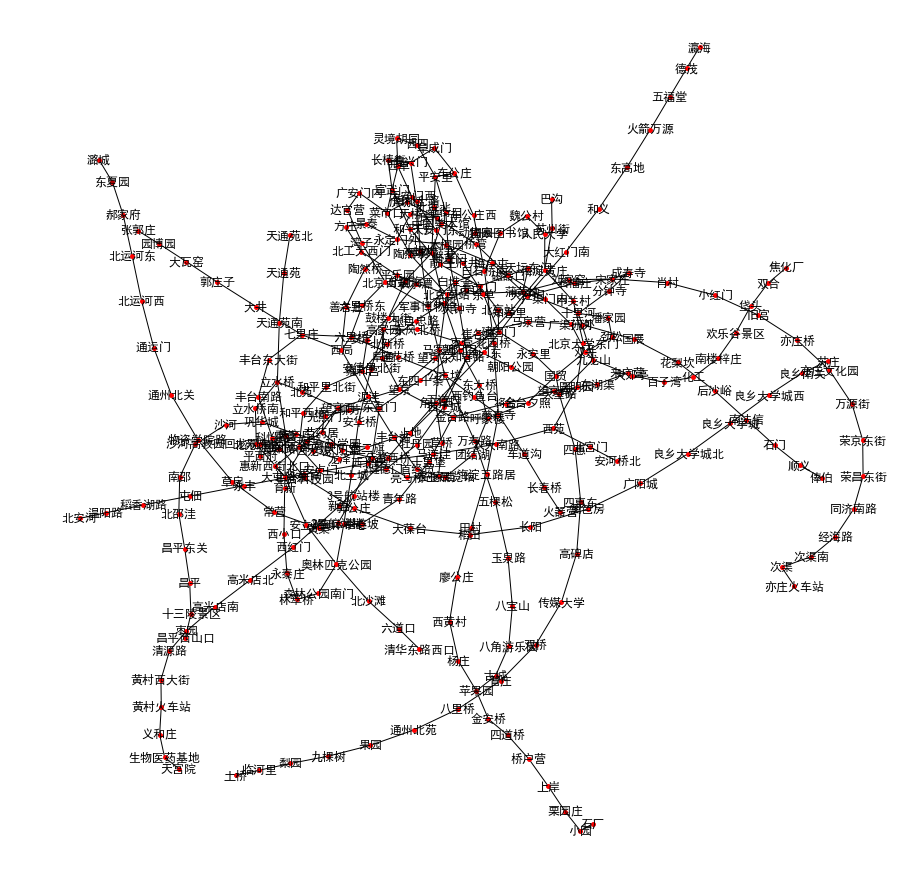

In [139]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict,Counter
#获得站点之间的关系
def get_connection(dic_subway):
    dicts=defaultdict(list)
    for line,stations in dic_subway.items():
        #取相邻两站名称
        for k,v in enumerate(stations):
            if k>0 and k<len(stations)-1: #中间站
                dicts[v].append(stations[k-1])
                dicts[v].append( stations[k+1])
            elif k==0: #起始站
                dicts[v].append(stations[k+1])
            else: #终点站
                dicts[v].append(stations[k-1])
    return dicts

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
graph=get_connection(dic_subway)
subway_station=nx.Graph(graph)
plt.figure(3,figsize=(12,12))#设置图片大小 
nx.draw(subway_station, pos=nx.spring_layout(subway_station), with_labels=True, node_size=15)

In [156]:
#参考优秀作业https://github.com/sharon1234567/ML-COURSE/blob/master/Homework-3-search%20problem.ipynb
def search_byway(graph, start, byway, goal, strategy):
    all_line = [start] + byway +[goal]
    path = []
    for i in range(len(all_line)-1):
        sub_path =  search(graph, all_line[i], all_line[i+1], strategy)
        path += sub_path[1:]
    return path
#最小换乘站策略            
def get_total_station(path):
    return len(path)
#路径最短策略
def get_change_times(path):
    times = 1
    for i in range(len(path)-2):
        if in_the_same_line(path[i],path[i+2])==False:
            times += 1
    return times
            
def in_the_same_line(s1,s2):
    for i in range(len(df_station)):
        if (s1 in df_station.iat[i,1])and (s2 in df_station.iat[i,1]):
            return True
    return False

def sort_path(cmp_func, beam=-1):
    def _sorted(pathes):
        return sorted(pathes, key=cmp_func)
    return _sorted
def search(graph, start, goal, strategy):
    pathes = [[start]]
    seen = set()   
    while pathes:
        path = pathes.pop(0)
        #print('path:',path)
        frontier = path[-1]
      
        if frontier in seen: continue
        
        successors = graph[frontier]
       # print('successors:',successors)
        
        for city in successors:
            if city in path: continue
            
            new_path = path+[city]
            if goal in new_path:
                #print('Done')
                return new_path
            
            pathes.append(new_path)
        #print('pathes:', pathes)
            
        seen.add(frontier)
        pathes = strategy(pathes)
        #print('pathes_sorted:', pathes)

In [154]:
search(subway_station, '奥林匹克公园', '北京南站', strategy = sort_path(get_total_station))

['奥林匹克公园',
 '奥体中心',
 '北土城',
 '安华桥',
 '安德里北街',
 '鼓楼大街',
 '什刹海',
 '南锣鼓巷',
 '中国美术馆',
 '珠市口',
 '虎坊桥',
 '菜市口',
 '陶然亭',
 '北京南站']

In [155]:
search_byway(subway_station, '奥林匹克公园', ['永安里'],'北京南站', strategy = sort_path(get_total_station))

['安立路',
 '大屯路东',
 '关庄',
 '望京西',
 '望京',
 '金台路',
 '呼家楼',
 '金台夕照',
 '国贸',
 '永安里',
 '国贸',
 '大望路',
 '九龙山',
 '十里河',
 '蒲黄榆',
 '北京南站']

# 课程代码

In [9]:
import re
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""
city_location={}
for line in coordination_source.split('\n'):
    if line.strip()=='':continue
    city=re.findall("name:'(\w+)'",line)[0]
    x_y=re.findall("geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
    x_y=tuple(map(float,x_y))
    city_location[city]=x_y
    print(city,x_y)
print(city_location)

兰州 (103.73, 36.03)
嘉峪关 (98.17, 39.47)
西宁 (101.74, 36.56)
成都 (104.06, 30.67)
石家庄 (114.48, 38.03)
拉萨 (102.73, 25.04)
贵阳 (106.71, 26.57)
武汉 (114.31, 30.52)
郑州 (113.65, 34.76)
济南 (117.0, 36.65)
南京 (118.78, 32.04)
合肥 (117.27, 31.86)
杭州 (120.19, 30.26)
南昌 (115.89, 28.68)
福州 (119.3, 26.08)
广州 (113.23, 23.16)
长沙 (113.0, 28.21)
海口 (110.35, 20.02)
沈阳 (123.38, 41.8)
长春 (125.35, 43.88)
哈尔滨 (126.63, 45.75)
太原 (112.53, 37.87)
西安 (108.95, 34.27)
台湾 (121.3, 25.03)
北京 (116.46, 39.92)
上海 (121.48, 31.22)
重庆 (106.54, 29.59)
天津 (117.2, 39.13)
呼和浩特 (111.65, 40.82)
南宁 (108.33, 22.84)
西藏 (91.11, 29.97)
银川 (106.27, 38.47)
乌鲁木齐 (87.68, 43.77)
香港 (114.17, 22.28)
澳门 (113.54, 22.19)
{'兰州': (103.73, 36.03), '嘉峪关': (98.17, 39.47), '西宁': (101.74, 36.56), '成都': (104.06, 30.67), '石家庄': (114.48, 38.03), '拉萨': (102.73, 25.04), '贵阳': (106.71, 26.57), '武汉': (114.31, 30.52), '郑州': (113.65, 34.76), '济南': (117.0, 36.65), '南京': (118.78, 32.04), '合肥': (117.27, 31.86), '杭州': (120.19, 30.26), '南昌': (115.89, 28.68), '福州': (119.3, 

In [10]:
import math
#经纬度到平面的变化
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [11]:
def get_city_distance(city1,city2):
    return geo_distance(city_location[city1],city_location[city2])

In [12]:
get_city_distance('杭州','上海')

153.5185697155768

In [13]:
import networkx as nx
cities=list(city_location.keys())
cities

['兰州',
 '嘉峪关',
 '西宁',
 '成都',
 '石家庄',
 '拉萨',
 '贵阳',
 '武汉',
 '郑州',
 '济南',
 '南京',
 '合肥',
 '杭州',
 '南昌',
 '福州',
 '广州',
 '长沙',
 '海口',
 '沈阳',
 '长春',
 '哈尔滨',
 '太原',
 '西安',
 '台湾',
 '北京',
 '上海',
 '重庆',
 '天津',
 '呼和浩特',
 '南宁',
 '西藏',
 '银川',
 '乌鲁木齐',
 '香港',
 '澳门']

In [14]:
city_graph=nx.Graph()
city_graph.add_nodes_from(cities)

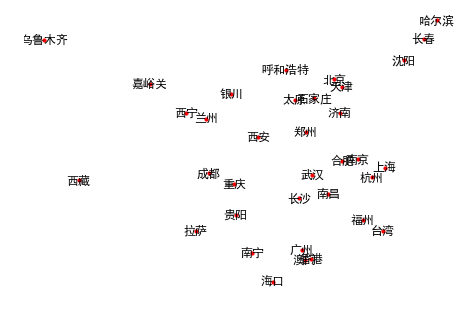

In [15]:
nx.draw(city_graph, city_location, with_labels=True, node_size=10)

In [16]:
threshold = 790
from collections import defaultdict
import matplotlib.pyplot as plt
cities_connection = defaultdict(list)
for c1 in cities:
    for c2 in cities:
        if c1==c2:continue
        if get_city_distance(c1,c2)<threshold:
            cities_connection[c1].append(c2)
cities_connection["兰州"]

['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川']

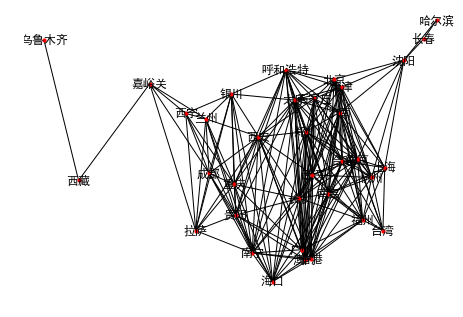

In [17]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
cities_connection_graph=nx.Graph(cities_connection)
nx.draw(cities_connection_graph,city_location,with_labels=True,node_size=10)

In [18]:
def is_goal(desitination):
    def _wrap(current_path):
        return current_path[-1] == desitination
    return _wrap

def search(graph, start, is_goal, search_strategy):
    pathes=[[start]]
    seen=set()
    while pathes:
        path=pathes.pop(0)
        froniter=path[-1]
        if froniter in seen:continue
        successors=graph[froniter]
        for city in successors:
            if city in path:continue
            new_path=path+[city]
            pathes.append(new_path)
            if is_goal(new_path):return new_path
        seen.add(froniter)
        pathes = search_strategy(pathes)

In [19]:
def get_path_distance(path):
    distance = 0    
    for i, c in enumerate(path[:-1]):
        distance += get_city_distance(c, path[i+1])
    
    return distance

In [20]:
def sort_path(cmp_func, beam=-1):
    def _sorted(pathes):
        return sorted(pathes, key=cmp_func)[:beam]
    return _sorted

In [21]:
def get_total_station(path):
    return len(path)

In [22]:
def get_comprehensive_path(path):
    return get_path_distance(path) + get_total_station(path)

In [23]:
def get_as_much_path(path): 
    return -1 * len(path)

In [29]:
search(cities_connection, start='北京', is_goal=is_goal('拉萨'), search_strategy=lambda n:n)

['北京', '石家庄', '西安', '拉萨']

In [30]:
search(cities_connection, start='北京', is_goal=is_goal('拉萨'), search_strategy=sort_path(get_path_distance))

['北京', '太原', '西安', '拉萨']

In [31]:
search(cities_connection, start='北京', is_goal=is_goal('拉萨'), search_strategy=sort_path(get_total_station))

['北京', '石家庄', '西安', '拉萨']

In [32]:
search(cities_connection, start='北京', is_goal=is_goal('拉萨'), search_strategy=sort_path(get_comprehensive_path))

['北京', '太原', '西安', '拉萨']

In [33]:
search(cities_connection, start='北京', is_goal=is_goal('拉萨'), search_strategy=sort_path(get_as_much_path))

['北京', '石家庄', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '贵阳', '拉萨']